<a href="https://colab.research.google.com/github/Gatwaza/Gatwaza/blob/main/Summative_Assignment_PCA_Jean_Robert_Gatwaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motivating PCA**


---

\
The goal of PCA is to extract information while reducing the number of features
from a dataset by identifying which existing features relate to another. The crux of the algorithm is trying to determine the relationship between existing features, called principal components, and then quantifying how relevant these principal components are. The principal components are used to transform the high dimensional data to a lower dimensional data while preserving as much information. For a principal component to be relevant, it needs to capture information about the features. We can determine the relationships between features using covariance.

In [ ]:
import numpy as np

In [ ]:
data = np.array([
    [   1,   2,  -1,   4,  10],
    [   3,  -3,  -3,  12, -15],
    [   2,   1,  -2,   4,   5],
    [   5,   1,  -5,  10,   5],
    [   2,   3,  -3,   5,  12],
    [   4,   0,  -3,  16,   2],
])

# Calculate the mean of each feature
mean_vector = np.mean(data, axis=0)

# Center the data by subtracting the mean
centered_data = data - mean_vector

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[  2.16666667  -1.06666667  -1.76666667   5.5         -4.36666667]
 [ -1.06666667   4.26666667   0.46666667  -6.6         19.66666667]
 [ -1.76666667   0.46666667   1.76666667  -3.3          2.36666667]
 [  5.5         -6.6         -3.3         24.7        -27.9       ]
 [ -4.36666667  19.66666667   2.36666667 -27.9         92.56666667]]


### Step 1: Standardize the Data along the Features

---



---





> 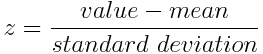



---



Explain why we need to handlethe data on the same scale.

**[TO DO: Insert Answer here]**

In [ ]:
import numpy as np
#standardized_data = #TO DO:  Insert code here
# Given dataset
data = np.array([
    [1, 2, -1, 4, 10],
    [3, -3, -3, 12, -15],
    [2, 1, -2, 4, 5],
    [5, 1, -5, 10, 5],
    [2, 3, -3, 5, 12],
    [4, 0, -3, 16, 2],
])

# Calculate the mean and standard deviation of each feature
mean_vector = np.mean(data, axis=0)
std_dev_vector = np.std(data, axis=0)

# Standardize the data
standardized_data = (data - mean_vector) / std_dev_vector

# Print the standardized data
print("Standardized Data:")
print(standardized_data)


#Why Standardize the Data?

#----> Scale Independence:

#Standardizing the data ensures that all features are on the same scale. This is important in PCA because it is a variance-based method, and the variance of each feature contributes to the principal components. Features on different scales may have different variances, and this could lead PCA to give more weight to features with larger variances.

#----> Equal Weight to Features:

#PCA aims to find the directions (principal components) of maximum variance. If one feature has a larger scale than another, it might dominate the variance computation and, consequently, dominate the principal components. Standardizing the features ensures that all features contribute equally to the variance calculation.

#----> Numerical Stability:

#Standardization improves the numerical stability and convergence of certain algorithms. It can help prevent issues related to scale when performing computations, especially in optimization algorithms.

#----> Interpretability:

#Standardized data makes the interpretation of principal components more straightforward. The coefficients in the principal component vectors represent the importance of each standardized feature in the corresponding principal component.


#By standardizing the data, we make sure that the PCA algorithm focuses on the underlying patterns and relationships in the data without being influenced by differences in the scales of the original features. It helps ensure that the principal components capture the true structure of the data in terms of relative variances across features.

Standardized Data:
[[-1.36438208  0.70710678  1.5109662  -0.99186978  0.77802924]
 [ 0.12403473 -1.94454365 -0.13736056  0.77145428 -2.06841919]
 [-0.62017367  0.1767767   0.68680282 -0.99186978  0.20873955]
 [ 1.61245155  0.1767767  -1.78568733  0.33062326  0.20873955]
 [-0.62017367  1.23743687 -0.13736056 -0.77145428  1.00574511]
 [ 0.86824314 -0.35355339 -0.13736056  1.65311631 -0.13283426]]


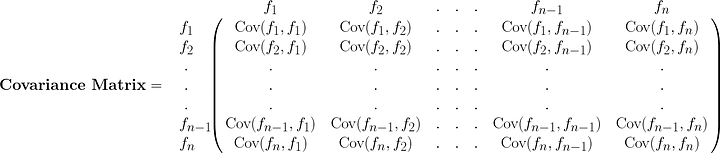

we use the pairwise covariance of the different features to determine how they relate to each other. With these covariances, our goal is to group / cluster based on similar patterns. Intuitively, we can relate features if they have similar covariances with other features.

### Step 2: Calculate the Covariance Matrix

---
with using numpy with arguments (ddof =0, rowvar = False)


In [ ]:
import numpy as np

# Calculate the covariance matrix
cov_matrix = np.cov(standardized_data, ddof=0, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
[[ 1.         -0.35082321 -0.9029865   0.75182742 -0.30833773]
 [-0.35082321  1.          0.16997503 -0.64291136  0.98959863]
 [-0.9029865   0.16997503  1.         -0.49956057  0.18506849]
 [ 0.75182742 -0.64291136 -0.49956057  1.         -0.58348328]
 [-0.30833773  0.98959863  0.18506849 -0.58348328  1.        ]]


### Step 3: Eigendecomposition on the Covariance Matrix

Hint:  [Using numpy](https://https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [ ]:
import numpy as np

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[3.17488134e+00 1.44713013e+00 4.12109190e-02 3.95157890e-05
 3.36738100e-01]

Eigenvectors:
[[-0.4640131   0.45182808 -0.70733581  0.28128049 -0.03317471]
 [ 0.45019005  0.48800851  0.29051532  0.6706731  -0.15803498]
 [ 0.37929082 -0.55665017 -0.48462321  0.24186072 -0.5029143 ]
 [-0.4976889   0.03162214  0.36999674 -0.03373724 -0.78311558]
 [ 0.43642295  0.49682965 -0.20861365 -0.64143906 -0.32822489]]


### Step 4: Sort the Principal Components
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

In [ ]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]

print('\n\n sorted eigen values:\n{}'.format(sorted_eigenvalues))
sorted_eigenvectors = eigenvectors[:, order_of_importance] # sort the columns
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [0 1 4 2 3]


 sorted eigen values:
[3.17488134e+00 1.44713013e+00 3.36738100e-01 4.12109190e-02
 3.95157890e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


Question:

1. Why do we order eigen values and eigen vectors?

The ordering of eigenvalues and corresponding eigenvectors is crucial in Principal Component Analysis (PCA) for the following reasons:



*   Identifying Principal Components:

The eigenvalues represent the variance captured by each principal component. Sorting them in descending order helps identify which principal components contribute the most to the total variance in the data.

*   Reducing Dimensionality:


Principal components are ordered by the amount of variance they explain. By selecting the top
k principal components (those corresponding to the largest eigenvalues), we can achieve dimensionality reduction while retaining the most important information.


*   Interpretability:



Ordering eigenvalues allows us to prioritize principal components in terms of their significance. This makes it easier to interpret the results and understand the relative importance of each component.


*   Eigenvalue Thresholding:

In some cases, eigenvalues may be very small, indicating that the corresponding principal components contribute little to the overall variance. Ordering helps in identifying and potentially discarding components with negligible contributions, aiding in model simplification.





2. Is it true we would consider the lowest eigen value compared to the highest? Defend your answer


It is not true that we would consider the lowest eigenvalue compared to the highest when performing PCA. The opposite is true; we prioritize the highest eigenvalues. Here's the reasoning:

*   Variance Capture:




Principal components corresponding to higher eigenvalues capture more variance in the data. Considering the highest eigenvalues ensures that we retain the most significant information about the dataset.
* Dimensionality Reduction:

The goal of PCA is often to reduce dimensionality while preserving as much variance as possible. This is achieved by selecting the top principal components, which correspond to the highest eigenvalues.
* Information Retention:

The eigenvalues represent the amount of information retained in each principal component. Higher eigenvalues indicate that the corresponding principal components contain more information about the original features.
In summary, the highest eigenvalues are considered in PCA because they represent the principal components that capture the most information and variance in the dataset.




You want to see what percentage of information each eigen value holds. You would have print out the percentage of each eigen value using the formula



> (sorted eigen values / sum of all sorted eigen values) * 100



In [ ]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors
# Given eigenvalues
sorted_eigenvalues = np.array([3.17488134e+00, 1.44713013e+00, 3.36738100e-01, 4.12109190e-02, 3.95157890e-05])


explained_variance = (sorted_eigenvalues / np.sum(sorted_eigenvalues)) * 100
explained_variance =["{:.2f}%".format(value) for value in explained_variance]
print( explained_variance)

['63.50%', '28.94%', '6.73%', '0.82%', '0.00%']


#Initialize the number of Principle components then perfrom matrix multiplication with the variable K example k = 3 for 3 priciple components




> The reulting matrix (with reduced data) = standardized data * vector with columns k

See expected output for k = 2



In [ ]:
import numpy as np

# Given standardized data
standardized_data = np.array([
    [-1.36438208,  0.70710678,  1.5109662,  -0.99186978,  0.77802924],
    [ 0.12403473, -1.94454365, -0.13736056,  0.77145428, -2.06841919],
    [-0.62017367,  0.1767767,   0.68680282, -0.99186978,  0.20873955],
    [ 1.61245155,  0.1767767,  -1.78568733,  0.33062326,  0.20873955],
    [-0.62017367,  1.23743687, -0.13736056, -0.77145428,  1.00574511],
    [ 0.86824314, -0.35355339, -0.13736056,  1.65311631, -0.13283426],
])

# Specify the number of principal components (k)
k = 3

# Given sorted eigenvectors (considering k)
selected_eigenvectors = sorted_eigenvectors[:, :k]

# Perform matrix multiplication to obtain reduced data
reduced_data = np.matmul(standardized_data, selected_eigenvectors)

# Print the resulting matrix with reduced data
print("Resulting Matrix (with reduced data) for k={}:".format(k))
# Print the shape of the reduced_data matrix
print("Shape of the reduced_data matrix:", reduced_data.shape)


Resulting Matrix (with reduced data) for k=3:
Shape of the reduced_data matrix: (6, 3)


In [ ]:
print(reduced_data)

[[ 2.3577116  -0.75728867 -0.30499103]
 [-2.27171739 -1.81970664  0.4470405 ]
 [ 1.21259113 -0.50390931  0.35546937]
 [-1.41935913  1.9229856   0.48918845]
 [ 1.61562536  0.87541858  0.16812364]
 [-1.49485157  0.28250043 -1.15483094]]


In [ ]:
print(reduced_data.shape)

(6, 3)


# *What are 2 positive effects and 2 negative effects of PCA

Give 2 Benefits and 2 limitations

### Positive Effects of PCA:

1. **Dimensionality Reduction:**
   - **Positive Effect:** PCA helps in reducing the dimensionality of the dataset by transforming it into a new set of uncorrelated variables called principal components. This simplification can lead to improved computational efficiency, less storage space, and faster learning algorithms.

2. **Noise Reduction and Feature Selection:**
   - **Positive Effect:** PCA tends to emphasize the directions in which the data varies the most, capturing the most significant information. By focusing on the principal components with higher eigenvalues, PCA can reduce the impact of noise and highlight the essential features, promoting more robust and accurate models.

### Negative Effects of PCA:

1. **Loss of Interpretability:**
   - **Negative Effect:** The principal components obtained from PCA are linear combinations of the original features, making them less interpretable in terms of the original variables. While PCA is excellent for reducing dimensionality, it may result in a loss of direct insight into the meaning of the transformed features.

2. **Assumption of Linearity:**
   - **Negative Effect:** PCA assumes that the relationships between variables are linear. If the underlying relationships in the data are nonlinear, PCA may not capture the essential structure, leading to suboptimal results. Nonlinear variants of dimensionality reduction techniques may be more appropriate in such cases.

It's important to note that the impact of PCA depends on the specific characteristics of the data and the goals of the analysis. While PCA can offer significant advantages, it's essential to consider its limitations and potential drawbacks in certain scenarios.